# Bank Marketing Classification

## Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv", sep=';')

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# find unique values
data.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## Exploratory Data Analysis

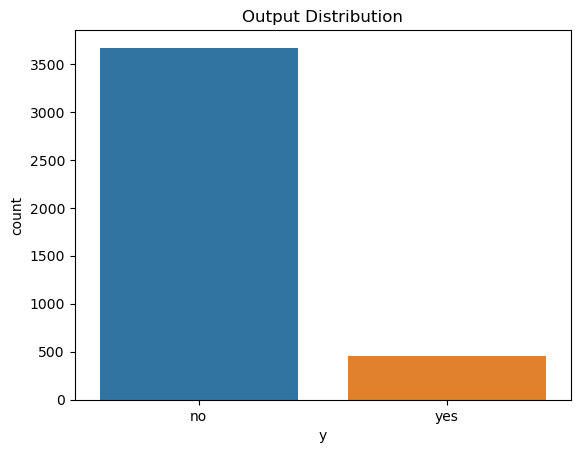

In [ ]:
# displaying the distribution of target variable "y"
sns.countplot(x = data["y"])
plt.title("Output Distribution")
plt.show()

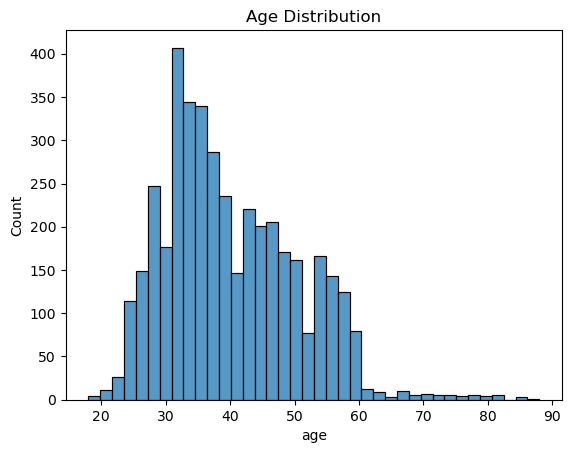

In [ ]:
sns.histplot(x = data["age"])
plt.title("Age Distribution")
plt.show()

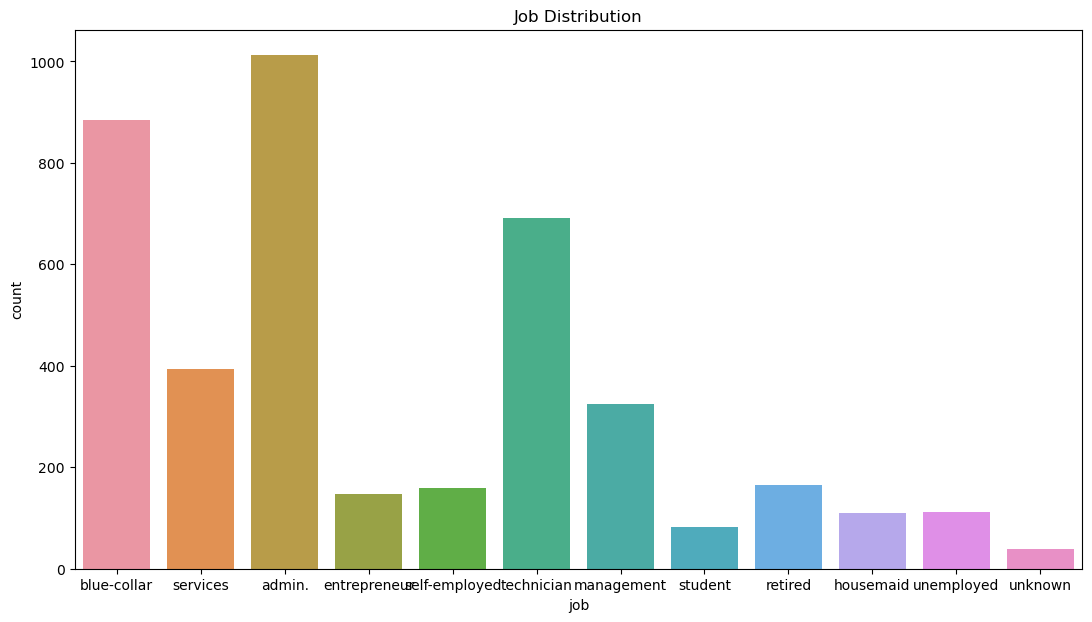

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["job"])
plt.title("Job Distribution")
plt.show()

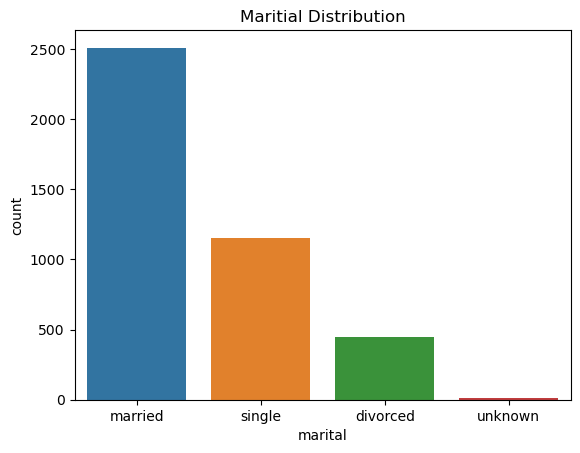

In [ ]:
sns.countplot(x = data["marital"])
plt.title("Maritial Distribution")
plt.show()

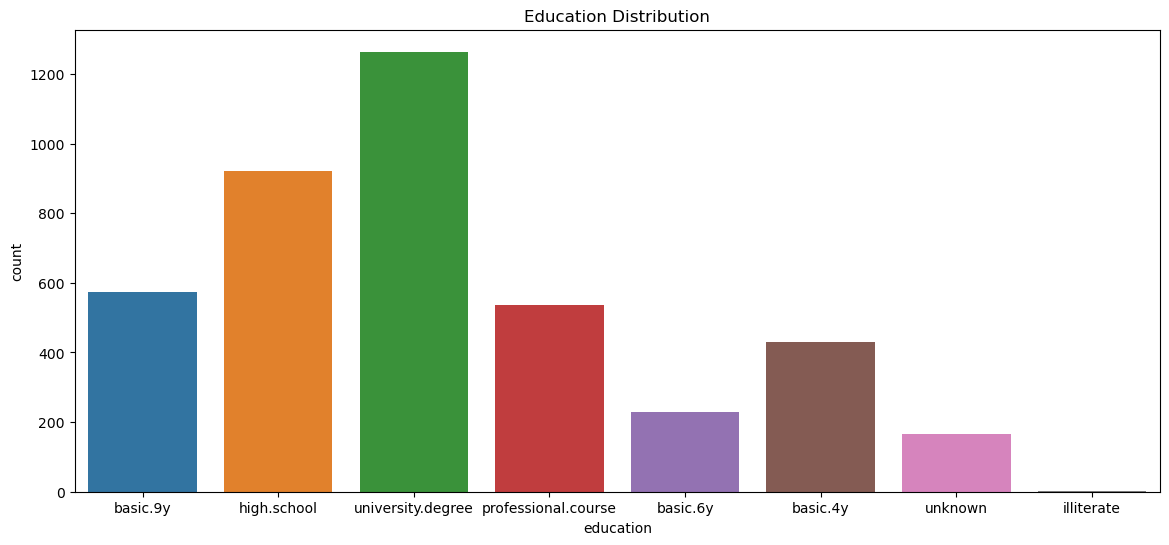

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x = data["education"])
plt.title("Education Distribution")
plt.show()

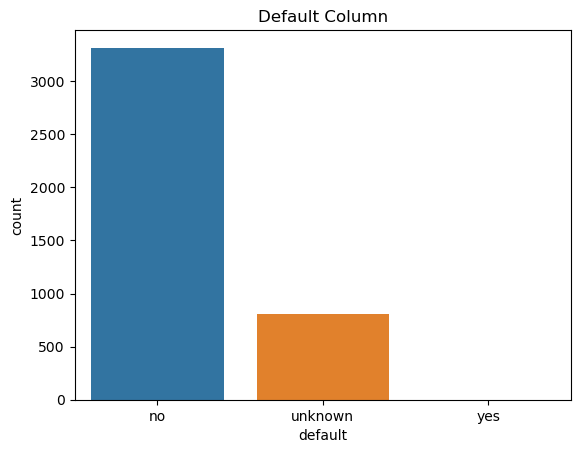

In [ ]:
sns.countplot(x = data["default"])
plt.title("Default Column")
plt.show()

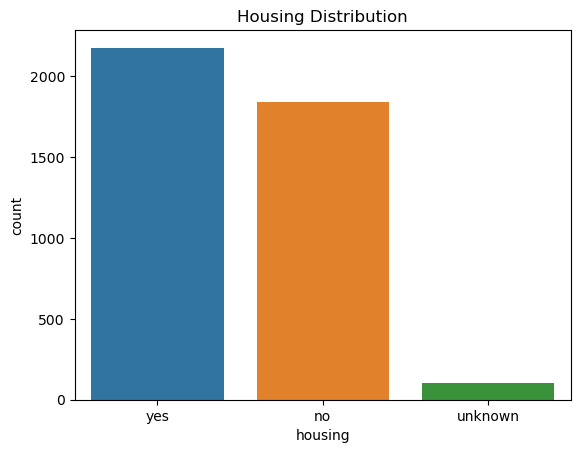

In [ ]:
sns.countplot(x = data["housing"])
plt.title("Housing Distribution")
plt.show()

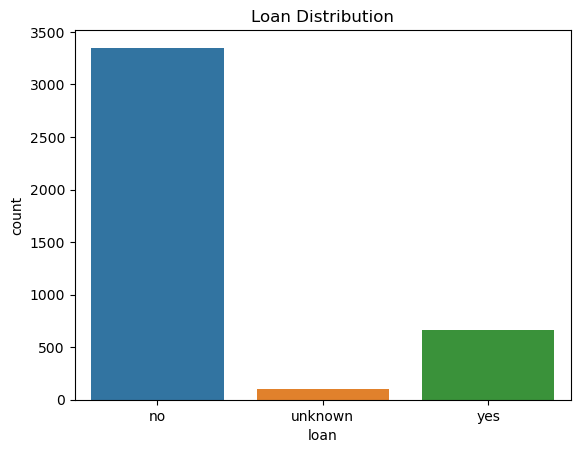

In [ ]:
sns.countplot(x = data["loan"])
plt.title("Loan Distribution")
plt.show()

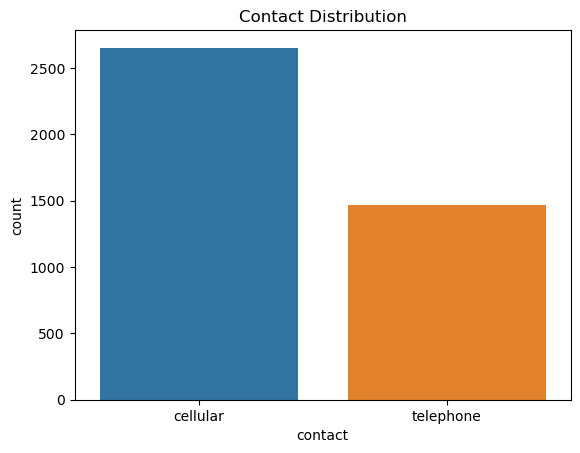

In [ ]:
sns.countplot(x = data["contact"])
plt.title("Contact Distribution")
plt.show()

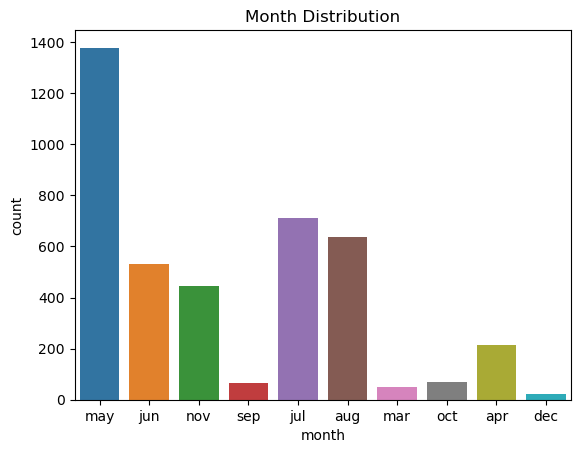

In [ ]:
sns.countplot(x = data["month"])
plt.title("Month Distribution")
plt.show()

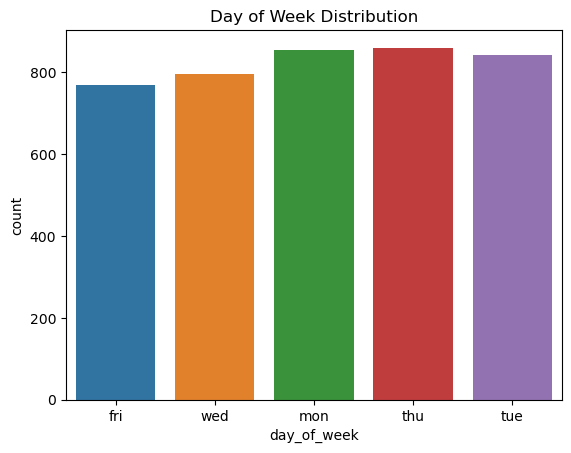

In [ ]:
sns.countplot(x = data["day_of_week"])
plt.title("Day of Week Distribution")
plt.show()

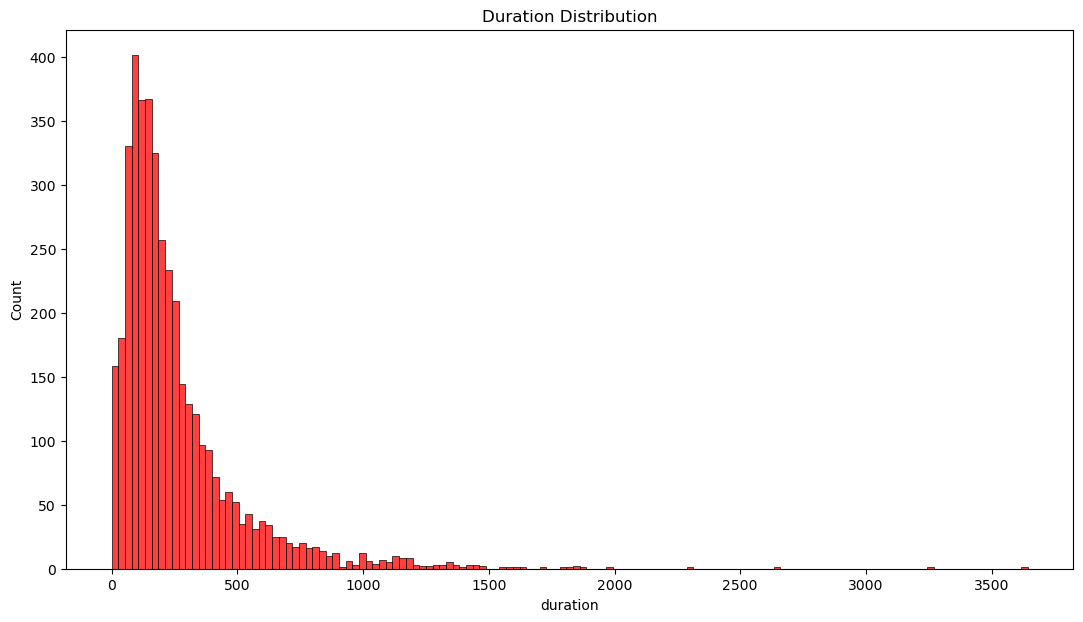

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["duration"], color = "r")
plt.title("Duration Distribution")
plt.show()

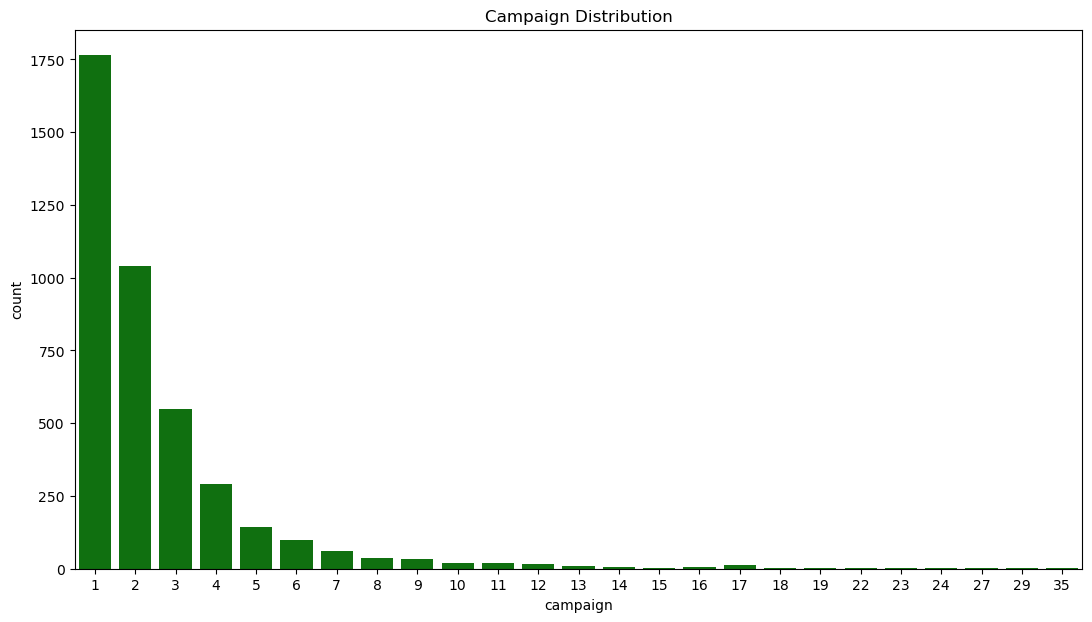

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["campaign"], color = "g")
plt.title("Campaign Distribution")
plt.show()

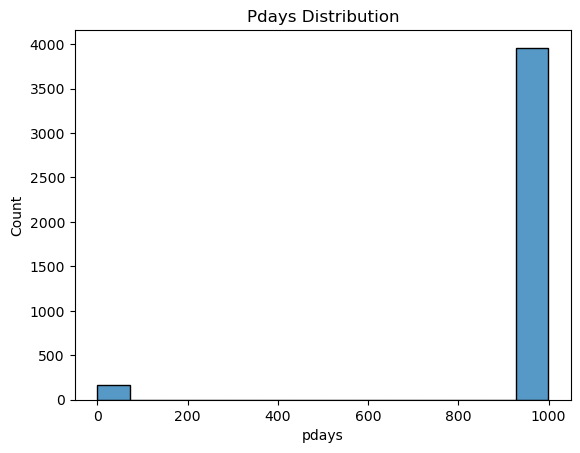

In [ ]:
sns.histplot(x = data["pdays"])
plt.title("Pdays Distribution")
plt.show()

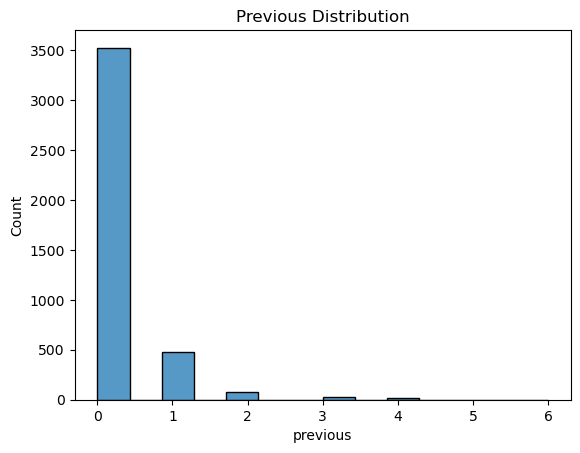

In [ ]:
sns.histplot(x = data["previous"])
plt.title("Previous Distribution")
plt.show()

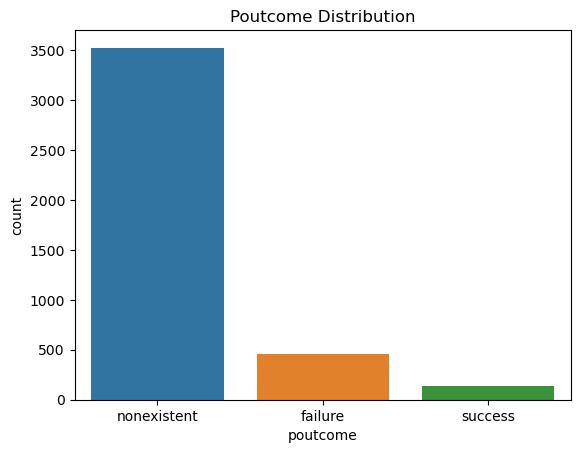

In [ ]:
sns.countplot(x = data["poutcome"])
plt.title("Poutcome Distribution")
plt.show()

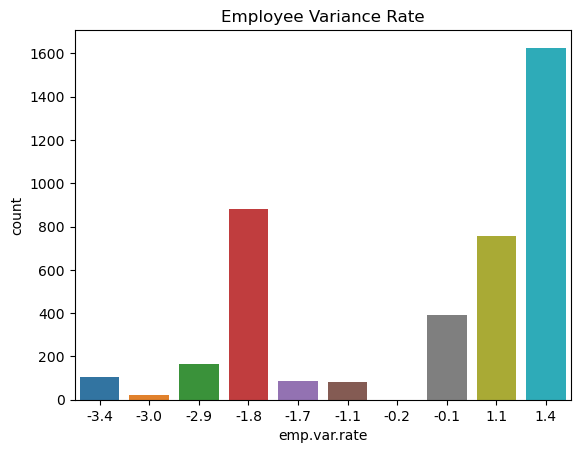

In [ ]:
sns.countplot(x = data["emp.var.rate"])
plt.title("Employee Variance Rate")
plt.show()

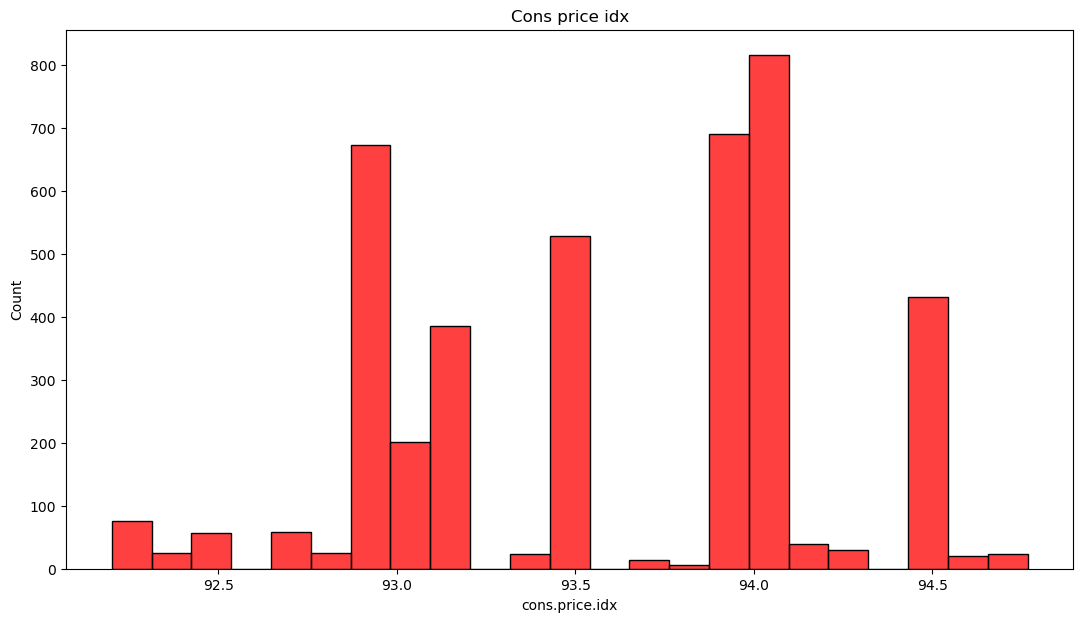

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.price.idx"], color = "r")
plt.title("Cons price idx")
plt.show()

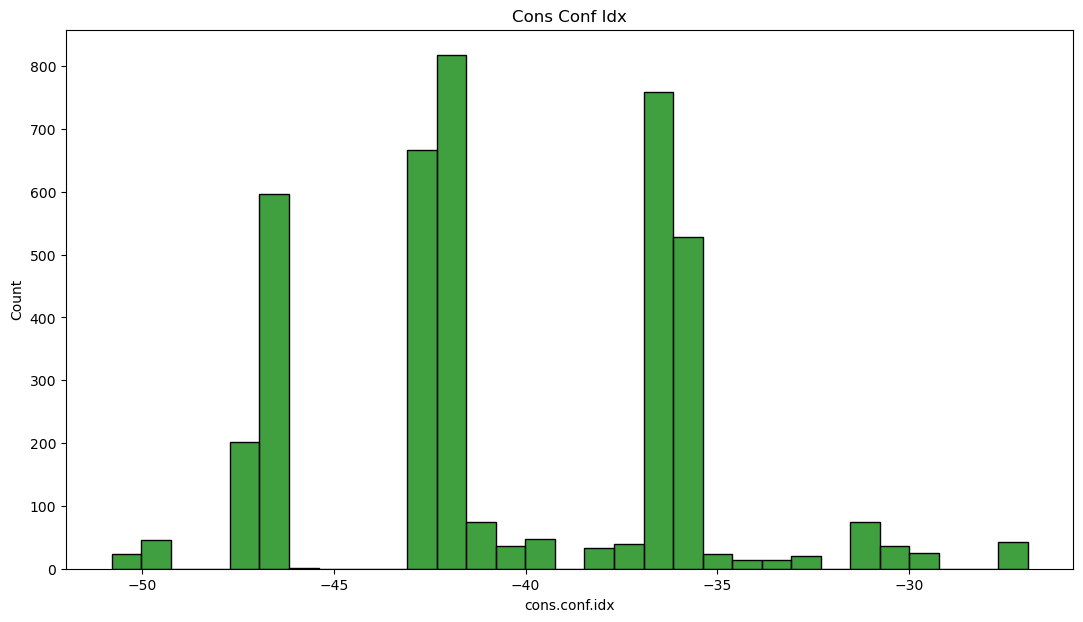

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.conf.idx"], color = "g")
plt.title("Cons Conf Idx")
plt.show()

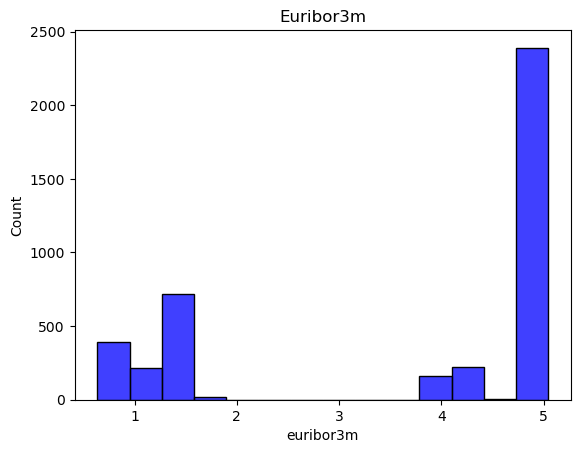

In [ ]:
sns.histplot(x = data["euribor3m"], color = "b")
plt.title("Euribor3m")
plt.show()

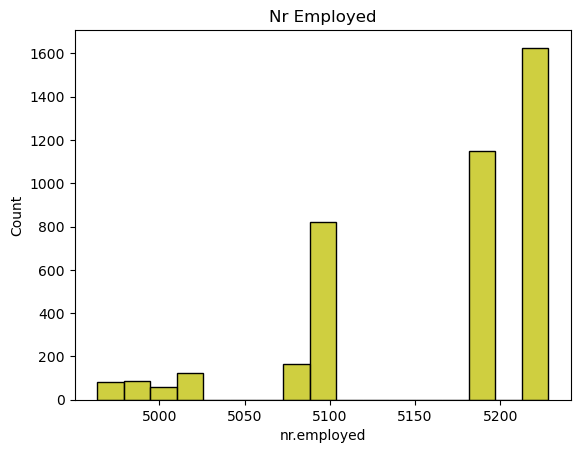

In [ ]:
sns.histplot(x = data["nr.employed"], color = "y")
plt.title("Nr Employed")
plt.show()

## Preprocessing the dataset

In [7]:
# check for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# check for duplicate values
data.duplicated().any()

True

In [24]:
# dropping the duplicate values
dups = data.duplicated()
data.drop_duplicates(inplace=True)
# reset indices after dropping rows
data=data.reset_index(drop=True)

# check after dropping the duplicate values
data.duplicated().any()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    data.loc[data[column] > upper_limit, column] = upper_limit

In [26]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
# applying logarithmic data transformation to reduce the skewness in some columns

# age, campaign and previous are applied log transformation
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation
columns = ['age', 'duration', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(data[columns])
data['age'] = to_right_skewed[:, 0]
data['duration'] = to_right_skewed[:, 1]
data['campaign'] = to_right_skewed[:, 2]
data['previous'] = to_right_skewed[:, 3]

# nr_employed is applied x² transformation
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(data[columns])
data['nr.employed'] = to_left_skewed[:, 0]

In [28]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,3,1,0,0,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
1,4.060443,7,1,3,1,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
2,3.637586,7,1,3,0,2,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
3,3.713572,0,1,1,0,0,0,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0
4,4.043051,7,1,3,0,0,2,1,6,1,...,0.693147,999,0.0,1,1.1,93.994,-36.4,4.857,26946481.0,0


In [29]:
# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.476144,3,1,0,0,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
3,0.128579,0,1,1,0,0,0,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,-0.951256,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0


## Adding New Features

In [14]:
data['totalLoan'] = data['loan'] + data['housing']
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,1.476144,3,1,0,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2
3,0.128579,0,1,1,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2


## Coorelation Matrix

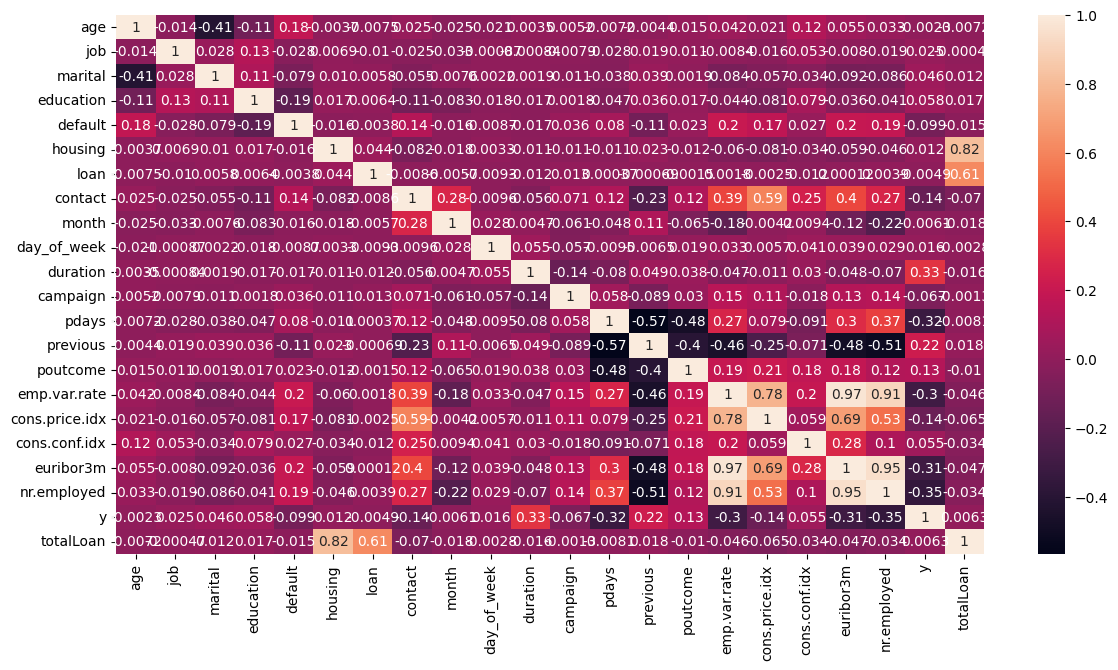

In [15]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)
plt.show()

## Input Split

In [16]:
X = data.drop(["y"], axis = 1)
y = data["y"]

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,1.476144,3,1,0,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
1,1.547276,7,1,3,1,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
2,-0.182202,7,1,3,0,2,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2
3,0.128579,0,1,1,0,0,0,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,0
4,1.476144,7,1,3,0,0,2,1,6,1,...,0.195443,0.0,1,0.648101,0.722628,0.88699,0.712463,0.327859,0,2


## Model Selection

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create  Dictionary for storing importance and names
    data={'features':feature_names,'importance':feature_importance}
    f_d = pd.DataFrame(data)

    # Sort by feature importance
    f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    # Modify plot options
    plt.figure(figsize=(10,8))

    sns.barplot(x=f_d['importance'], y=f_d['features'])

    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

In [19]:
# Oversampling the "yes" samples
#!pip install imblearn
from imblearn.over_sampling import SMOTE

# Since there are very less "yes" samples, the model is tended to predict the result as "no".
# This results in a very low recall rate. SMOTE is used to increase the number of "yes" samples thus to increase recall rate.
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [21]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,totalLoan
0,1.685933,2,1,2,0,0,0,1,6,2,...,1.235590,0.195443,0.000000,1,0.648101,0.722628,0.886990,0.714192,0.327859,0
1,-0.885067,1,1,2,0,2,0,0,6,2,...,-0.951256,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.322805,-0.947979,2
2,-0.759212,0,2,6,0,1,1,0,1,3,...,-0.951256,0.195443,0.000000,1,0.839079,-0.227562,0.951838,0.773578,0.849372,2
3,0.323377,0,0,3,0,1,1,0,7,1,...,0.016439,0.195443,0.693147,0,-0.115810,-0.649100,-0.323503,0.328472,0.395123,2
4,0.509318,10,1,2,0,2,0,0,6,4,...,0.016439,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.318769,-0.947979,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51211,-0.512057,9,1,4,0,0,0,0,1,1,...,0.016439,0.195443,0.000000,1,0.839079,-0.227562,0.951838,0.773578,0.849372,0
51212,-0.563439,9,1,5,0,2,0,0,6,1,...,-0.584905,0.195443,0.430734,0,-1.198017,-1.179479,-1.231373,-1.350954,-0.947979,2
51213,-1.431209,1,2,2,0,2,2,0,6,2,...,0.920430,0.195443,0.000000,1,-1.198017,-1.179479,-1.231373,-1.352906,-0.947979,4
51214,2.086357,5,0,0,0,2,0,0,7,4,...,-0.951256,0.195443,0.000000,1,-2.216565,-1.601017,2.248794,-1.675377,-2.061723,2


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8911508581752484
Test score: 0.9037220843672455
Model Score: 0.8398058252427184

RMSE: 0.40024264485094735


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),LogisticRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8911510483525887
Test score: 0.9037253493535327
Model Score: 0.8398058252427184

RMSE: 0.40024264485094735


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(C=c_values)

grid = GridSearchCV(LogisticRegression( max_iter=1000000), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'C': 100}


In [ ]:
model = make_pipeline(StandardScaler(),LogisticRegression(C=100))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.892126467931346
Test score: 0.9004864829567716
Model Score: 0.8406148867313916

RMSE: 0.39923065171478056


### Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [ ]:
model = make_pipeline(StandardScaler(), RidgeClassifier())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [ ]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = np.geomspace(100, 0.01, 5)

param_grid = dict(solver=solvers,alpha=alpha)

grid = GridSearchCV(RidgeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'alpha': 0.1, 'solver': 'auto'}


In [ ]:
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha = 0.1))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8823717016117529
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9092968192839823
Test score: 0.8818793261068304
Model Score: 0.8640776699029126

RMSE: 0.3686764572048063


In [ ]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 350, 'min_samples_split': 2}


In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 350, min_samples_split = 2 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9085157609470832
Test score: 0.8810728744939272
Model Score: 0.8551779935275081

RMSE: 0.38055486657312887


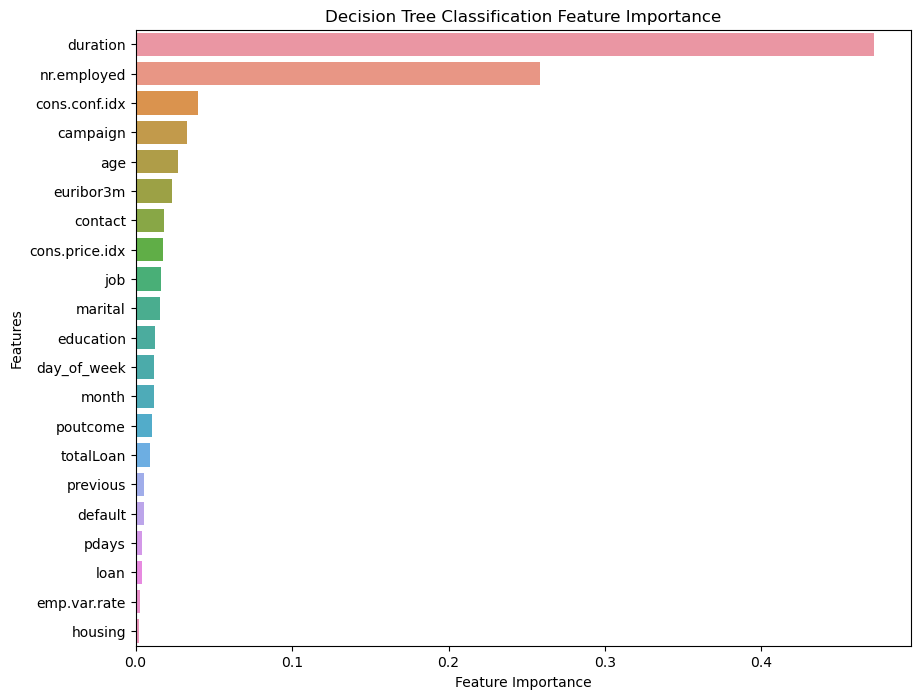

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'Decision Tree Classification ')

### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9453862026339561
Test score: 0.9004897479430586
Model Score: 0.88915857605178

RMSE: 0.33292855682296174


In [ ]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 300, 'min_samples_split': 3}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = 300, min_samples_split = 3)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9447996957162553
Test score: 0.9037253493535327
Model Score: 0.8923948220064725

RMSE: 0.32803228193811584


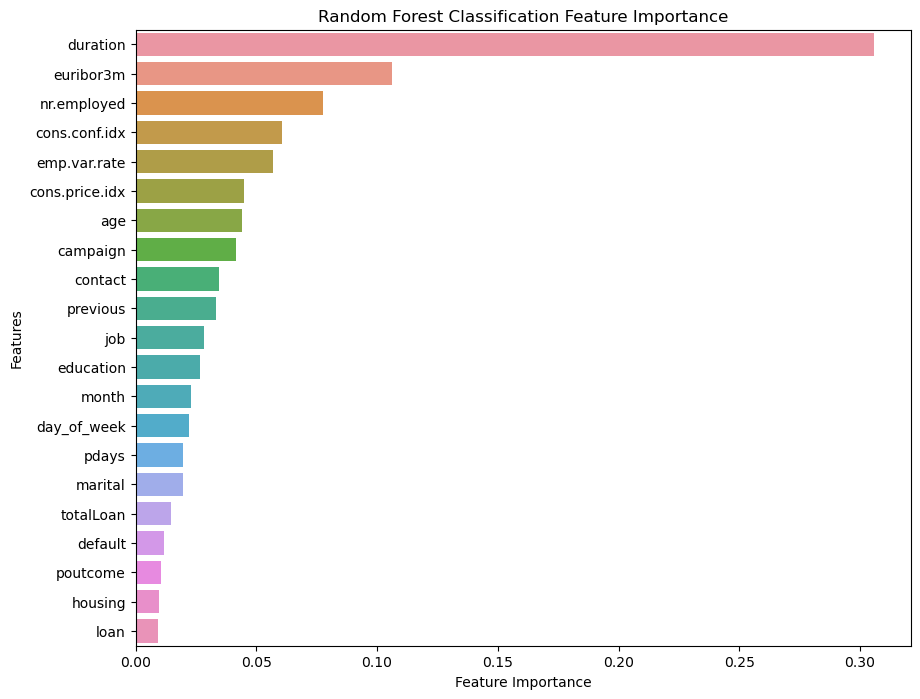

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'Random Forest Classification ')

### XGBoost Classification

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9387628964008938
Test score: 0.8948347916938749
Model Score: 0.8996763754045307

RMSE: 0.3167390481065908


In [ ]:
param_grid = {"max_depth":range(3,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 9}


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth = 9)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9416866828317406
Test score: 0.8915959252971138
Model Score: 0.8859223300970874

RMSE: 0.33775385993784385


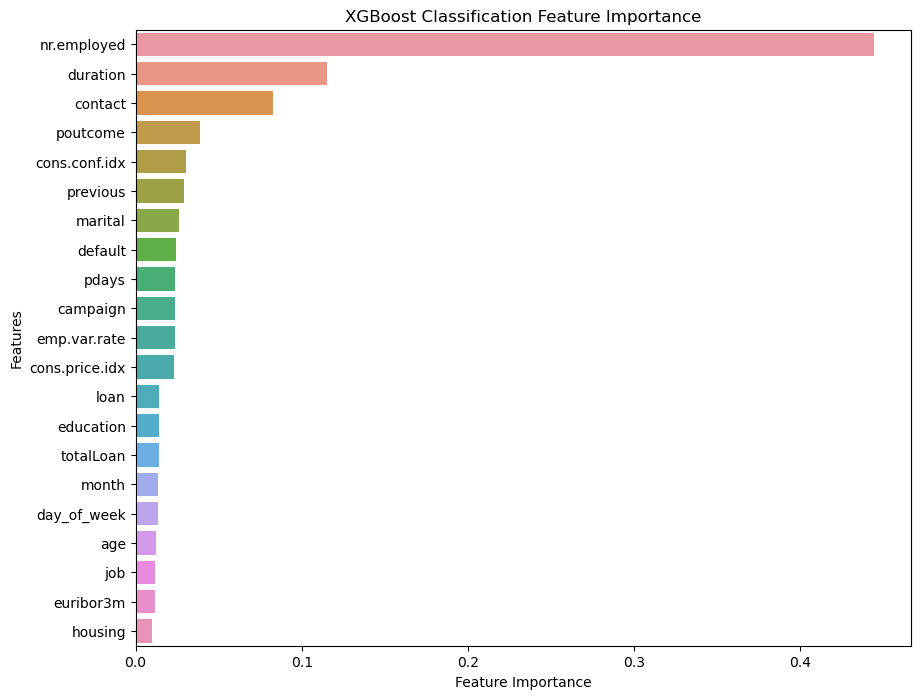

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'XGBoost Classification ')

### LightGBM

In [ ]:
# !pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9336916274425903
Test score: 0.8964542248922556
Model Score: 0.8956310679611651

RMSE: 0.3230618083878609


In [ ]:
param_grid = {"num_leaves":range(100,700, 100) }

grid = GridSearchCV(LGBMClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'num_leaves': 200}


In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves = 200)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9453911472448058
Test score: 0.9005028078882068
Model Score: 0.901294498381877

RMSE: 0.3141743172478027


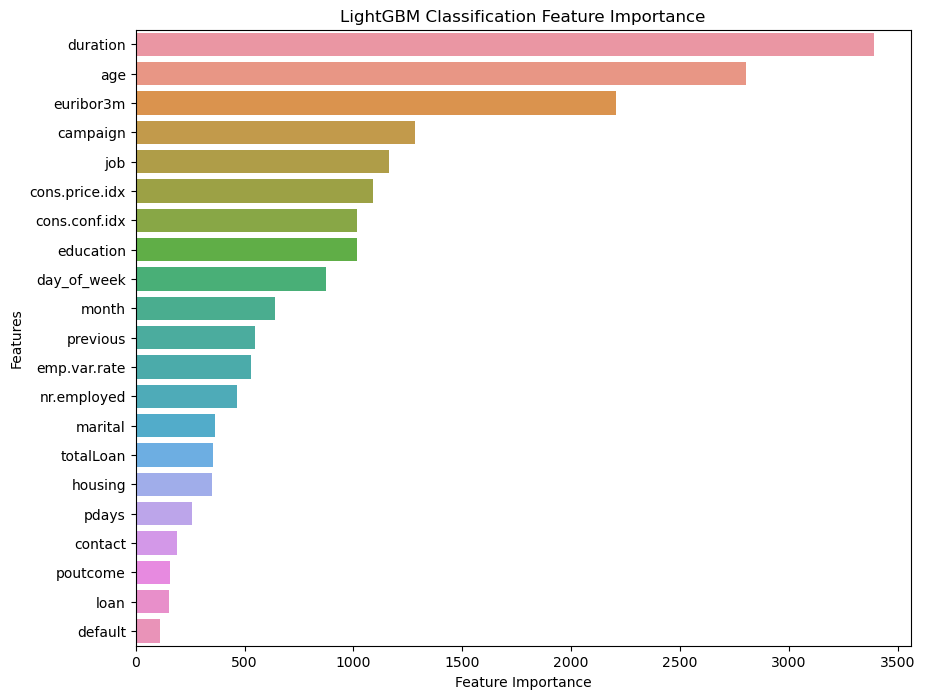

In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'LightGBM Classification ')

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_p).ravel()

print("TP: " + str(tp))
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("")

recall = tp / (tp + fn) * 100
precision = tp / (tp + fp) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 75
TN: 1039
FP: 66
FN: 56

Recall: 57.25190839694656 %
Precision: 53.191489361702125 %


# ANN Classification

## Preprocessing

In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [92]:
data = pd.read_csv("https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [94]:
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    X[col] = le.fit_transform(X[col])

X = X.values

In [95]:
y = le.fit_transform(y)

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Constructing the ANN

In [98]:
ann = tf.keras.models.Sequential()

In [99]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [100]:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [101]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [102]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Recall()])

In [103]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
901/901 [==============================] - 5s 3ms/step - loss: 0.2653 - recall_2: 0.0000e+00
Epoch 2/100
901/901 [==============================] - 5s 6ms/step - loss: 0.2078 - recall_2: 0.3448
Epoch 3/100
901/901 [==============================] - 2s 2ms/step - loss: 0.2021 - recall_2: 0.5020
Epoch 4/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1983 - recall_2: 0.5386
Epoch 5/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1960 - recall_2: 0.5484
Epoch 6/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1940 - recall_2: 0.5503
Epoch 7/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1926 - recall_2: 0.5574
Epoch 8/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1915 - recall_2: 0.5608
Epoch 9/100
901/901 [==============================] - 2s 3ms/step - loss: 0.1905 - recall_2: 0.5644
Epoch 10/100
901/901 [==============================] - 2s 2ms/step - loss: 0.1895 - re

## Model Evaluation

In [104]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

387/387 [==============================] - 1s 3ms/step


In [105]:
print(y_pred)
print(y_test)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[0 0 0 ... 0 0 0]


In [107]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("TP: " + str(tp))
print("TN: " + str(tn))
print("FP: " + str(fp))
print("FN: " + str(fn))
print("")

recall = tp / (tp + fn) * 100
precision = tp / (tp + fp) * 100

print("Recall: " + str(recall) + " %")
print("Precision: " + str(precision) + " %")

TP: 828
TN: 10501
FP: 467
FN: 561

Recall: 59.611231101511876 %
Precision: 63.938223938223935 %


In [108]:
import pickle

pickle.dump(ann, open("ann_model.sav", 'wb'))